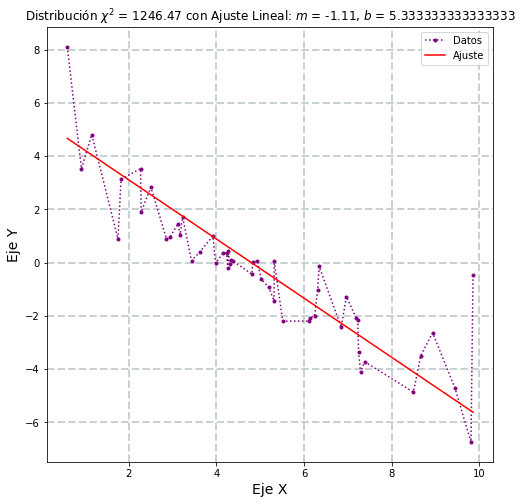

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def yModel(m, b):
    return m * x + b

def chiSquared(yObs, yMod, error):
    total = 0
    for yO, yM, sigma in zip(yObs, yMod, error):
        total = total + (yO - yM)**2/sigma**2
    return total
        
data = np.load('fit_exercise.npy')

x = data[0]
yObs = data[1]
error = data[2]
mValues = np.linspace(-2, 0, 10)
bValues = np.linspace(2, 8, 10)
chiSquaredValues, threeInfo = [], []

for m in mValues:
    for b in bValues:
        info = [m, b, chiSquared(yObs, yModel(m, b), error)]
        threeInfo.append(info)
        chiSquaredValues.append(chiSquared(yObs, yModel(m, b), error))
        
min_chiSquared = min(chiSquaredValues)
min_m = threeInfo[chiSquaredValues.index(min_chiSquared)][0]
min_b = threeInfo[chiSquaredValues.index(min_chiSquared)][1]

fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(x, yObs, color = 'purple', marker = '.', linestyle = 'dotted', label = 'Datos')
plt.plot(x, yModel(min_m, min_b), color = 'red', label = 'Ajuste')
plt.xlabel('Eje X', fontsize = 14)
plt.ylabel('Eje Y', fontsize = 14)
plt.title('Distribución $\chi^2$ = ' + "{0:.2f}".format(min_chiSquared) + 
          ' con Ajuste Lineal: $m$ = ' + "{0:.2f}".format(min_m) + ', $b$ = ' + str(min_b))
plt.grid(color='#95a5a6', linestyle='dashed', linewidth=2, alpha=0.5)
plt.legend()
plt.show()

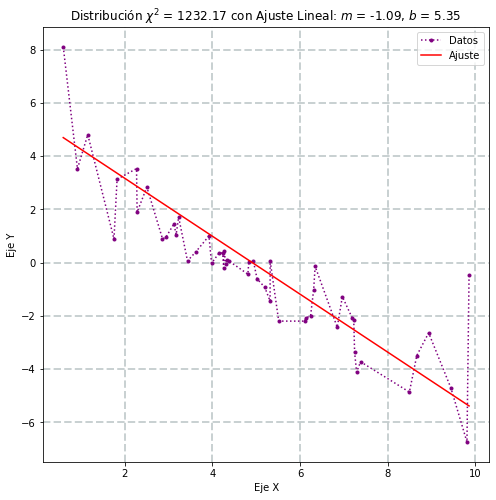

In [22]:
np.random.seed()

mValues = np.random.uniform(-2, 0, 10)
bValues = np.random.uniform(2, 8, 10)
chiSquaredValues, threeInfo = [], []

for m in mValues:
    for b in bValues:
        info = [m, b, chiSquared(yObs, yModel(m, b), error)]
        threeInfo.append(info)
        chiSquaredValues.append(chiSquared(yObs, yModel(m, b), error))
        
min_chiSquared = min(chiSquaredValues)
min_m = threeInfo[chiSquaredValues.index(min_chiSquared)][0]
min_b = threeInfo[chiSquaredValues.index(min_chiSquared)][1]

fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(x, yObs, color = 'purple', marker = '.', linestyle = 'dotted', label = 'Datos')
plt.plot(x, yModel(min_m, min_b), color = 'red', label = 'Ajuste')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Distribución $\chi^2$ = ' + "{0:.2f}".format(min_chiSquared) + 
          ' con Ajuste Lineal: $m$ = ' + "{0:.2f}".format(min_m) + ', $b$ = ' + "{0:.2f}".format(min_b))
plt.grid(color='#95a5a6', linestyle='dashed', linewidth=2, alpha=0.5)
plt.legend()
plt.show()

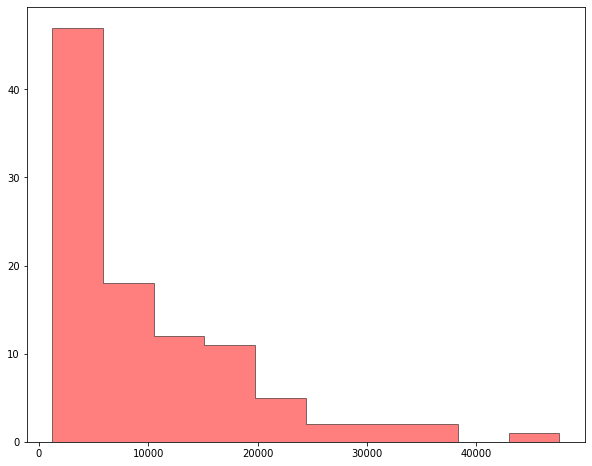

In [23]:
plt.figure(figsize = [10, 8])
plt.hist(chiSquaredValues, bins = 10, color = 'red', alpha = 0.5, histtype = 'stepfilled', edgecolor = 'black')
plt.show()

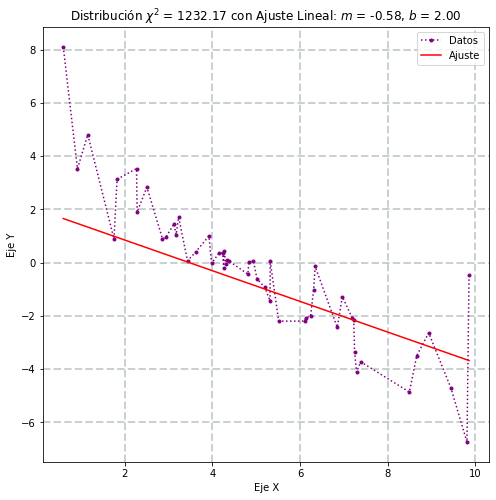

In [59]:
def line(args):
    return args[0]*x + args[1]

def chiSq(theta):
    yModel = line(theta)
    chi = (yObs - yModel)**2 / error**2
    return chi.sum()

results, info, chiValues = [], [], []

for m in mValues:
    for b in bValues:
        chi = chiSq([m, b])
        info = [m, b, chi]
        results.append(info)
        chiValues.append(chi)

        
min_chi = min(chiValues)
min_m = results[chiSquaredValues.index(min_chiSquared)][0]
min_b = results[chiSquaredValues.index(min_chiSquared)][1]

fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(x, yObs, color = 'purple', marker = '.', linestyle = 'dotted', label = 'Datos')
plt.plot(x, yModel(min_m, min_b), color = 'red', label = 'Ajuste')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Distribución $\chi^2$ = ' + "{0:.2f}".format(min_chi) + 
          ' con Ajuste Lineal: $m$ = ' + "{0:.2f}".format(min_m) + ', $b$ = ' + "{0:.2f}".format(min_b))
plt.grid(color='#95a5a6', linestyle='dashed', linewidth=2, alpha=0.5)
plt.legend()
plt.show()

# Optimize

In [61]:
x0 = [0, 7]
result = minimize(chiSq, x0)
result

      fun: 1231.1096772954259
 hess_inv: array([[ 3.34276013e-05, -7.47251470e-05],
       [-7.47251470e-05,  4.88710473e-04]])
      jac: array([-4.57763672e-05, -1.52587891e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 53
      nit: 5
     njev: 13
   status: 2
  success: False
        x: array([-1.10407573,  5.44055535])

In [63]:
m = result.x[0]
b = result.x[1]

m, b

(-1.1040757264975551, 5.44055535360655)